# **Data Source and Contents**

In [2]:
#Importing the necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from io import StringIO
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from pandas.core.common import random_state
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import re

In [4]:
#Selecting the same data file from CA-03 and reading it into a dataframe
census = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

In [5]:
#Viewing some initial samples
census.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [6]:
#Viewing how many rows and columns exist in the data file
census.shape

(48842, 11)

In [7]:
#Viewing the number of data entries
census.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [9]:
#Separating data into test and training dataframes 
train_data = census[census['flag']== 'train']
test_data = census[census['flag']== 'test']

In [10]:
#Binning categorical variables to organize them in the dataset
categorical = ['age_bin', 'capital_gl_bin', 'education_bin', 'hours_per_week_bin', 'msr_bin','race_sex_bin','occupation_bin']

In [11]:
#Creating dummies for test data
y_test = test_data['y']

x_test = test_data[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']]

x_test = pd.get_dummies(x_test, columns=categorical, drop_first=True)

#Creating dummies for train data
y_train = train_data['y']

x_train = train_data[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']]

x_train = pd.get_dummies(x_train, columns=categorical, drop_first=True)

# **Finding Optimal Value of a Key Hyper-Parameter**

<AxesSubplot:>

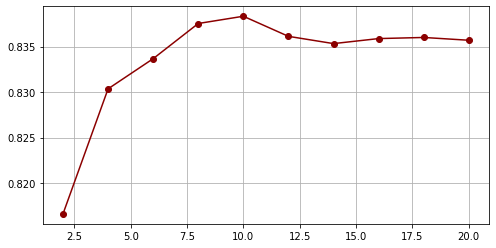

In [12]:
#Evaluating the performance of a decision tree classifier model with different values of the max_depth parameter
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkred',marker='o', grid=True)

The trend indicate that the accuracy is quite horrible in the beginning but gets better towards the middle, peaking at 10. Thus, 10 is the optimal value here, as it shows the highest accuracy at this point.

# **Building a Random Forest Model**

<AxesSubplot:>

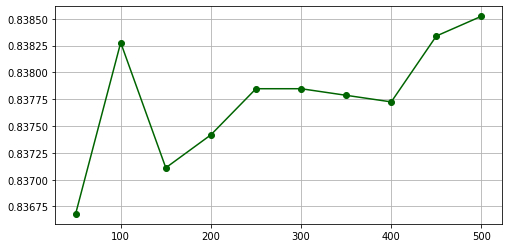

In [26]:
#Evaluating the performance of a random forest classifier model with different values of the max_depth parameter
results = []
max_depth_options = [50,100,150,200,250,300,350,400,450,500]
for trees in max_depth_options:
    model = RandomForestClassifier(n_estimators=trees, random_state=0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkgreen',marker='o', grid=True)

Once again, we are off to a bad start with the model, but significant improvement is seen in the next point, only for it to nosedive again. However, a more stable trend of improvement begins afterwards, and the best thus optimal decision tree in this model is at 500.





# **Building AdaBoost, Gradient Boost (classifier) and XGB Model**

# Adaboost

<AxesSubplot:>

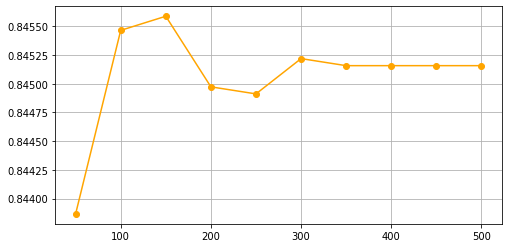

In [29]:
#Evaluating the performance of an AdaBoost classifier model with different values
accuracy_scores = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for items in n_estimator:
  admodel = AdaBoostClassifier(random_state =0, n_estimators = items)
  admodel.fit(x_train, y_train)
  y_pred = admodel.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  accuracy_scores.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(accuracy_scores, n_estimator).plot(color='orange', marker = 'o', grid=True)

The model makes a significant spike early on and peaks early at an optimal value of 150.

# Gradient Boost

<AxesSubplot:>

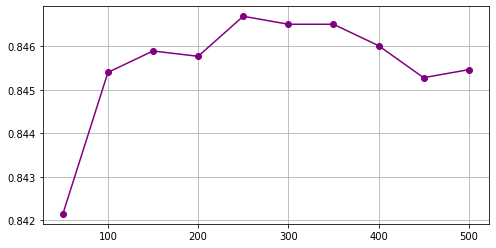

In [31]:
#Evaluating the performance of a Gradient Boost classifier model with different values
accuracy_scores = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for items in n_estimator:
  gmodel = GradientBoostingClassifier(random_state =0, n_estimators = items)
  gmodel.fit(x_train, y_train)
  y_pred = gmodel.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  accuracy_scores.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(accuracy_scores, n_estimator).plot(color='purple', marker = 'o', grid=True)

The model is mostly consistent throughout its course and reaches its optimal value at 250.

# XGB Model

In [33]:
#Installing XGBoost classifier
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
#Importing the datasets module from the scikit-learn library for xgb usage
from sklearn import datasets
import xgboost as xgb

In [35]:
#Importing the re module
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [37]:
#Cleaning the data by dropping commas and the < symbol to run xgboost without errors
x_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_train.columns.values]

In [38]:
#Renaming the column names in the dataframe
x_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_test.columns.values]

In [39]:
#Modifying the census dataframe to replace all occurrences of ', '  with < 
census=census.replace(', ','<',regex=True).astype(str)

In [40]:
#Viewing the top few rows of the test data
x_test.head()

,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55,capital_gl_bin_b. _ 0,capital_gl_bin_c. > 0,education_bin_b. Mid,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,...,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,msr_bin_b. Mid,msr_bin_c. High,race_sex_bin_b. Mid,race_sex_bin_c. High,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High
32561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
32562,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,1,0,0,0
32563,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
32564,0,0,0,1,0,1,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
32565,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


<AxesSubplot:>

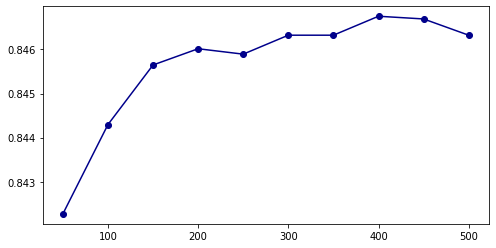

In [32]:
#Evaluating the performance of an XGBoost classifier model with different values
accuracy_scores = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for values in n_estimator:
  xgb_model = XGBClassifier(n_estimators=values, random_state=0)
  xgb_model.fit(x_train, y_train)
  y_pred = xgb_model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  accuracy_scores.append(accuracy)


plt.figure(figsize=(8,4))
pd.Series(accuracy_scores, n_estimator).plot(color='darkblue', marker = 'o')

The final model shows the most consistency, gradually increasing across different values, where its optimal value is at 400 with a few close competitors.

# Compare Performance

In [41]:
#Random Forest Model
forest = RandomForestClassifier(random_state = 0, n_estimators = 150)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
forest_accuracy = np.mean(y_test==y_pred)
forest_auc=roc_auc_score(y_test, y_pred)


In [42]:
#AdaBoost Model
adaboost = AdaBoostClassifier(random_state =0, n_estimators = 150)
adaboost.fit(x_train, y_train)
y_pred = adaboost.predict(x_test)
adaboost_acc = np.mean(y_test==y_pred)
adaboost_auc=roc_auc_score(y_test, y_pred)


In [46]:
#Gradient Boost Model
gboost = GradientBoostingClassifier(random_state =0, n_estimators = 150)
gboost.fit(x_train, y_train)
y_pred = gboost.predict(x_test)
gboost_accuracy = np.mean(y_test==y_pred)
gboost_auc=roc_auc_score(y_test, y_pred)

In [47]:
#XGB Boost Model
xgb = XGBClassifier(random_state=0, n_estimators=150)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
xgb_accuracy = np.mean(y_test==y_pred)
xgb_auc=roc_auc_score(y_test, y_pred)

In [51]:
#Dataset creation for organizing and comparing the performance metrics of the above machine learning models
comparison = pd.DataFrame({'Random Forest': [forest_accuracy, forest_auc, 150, 0],
                   'AdaBoost': [adaboost_acc, adaboost_auc, 150, 0],
                   'Gradient Boost': [gboost_accuracy, gboost_auc, 150, 0],
                   'XGB': [xgb_accuracy, xgb_auc, 150, 0]},
                  index=['Accuracy', 'AUC', 'n_estimators', 'random_state'])

In [52]:
#Here we can see the the comparison between the above models
comparison.head()

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.837111,0.845587,0.845894,0.845648
AUC,0.743675,0.744824,0.755172,0.751599
n_estimators,150.000000,150.000000,150.000000,150.000000
random_state,0.000000,0.000000,0.000000,0.000000
